In [1]:
import os
import sys

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../../..')))

In [2]:

from src.pipeline.modules.clip import ClipFast
from src.pipeline.modules.helper.vision import rotation_image_proper
from src.pipeline.modules.cloth_categories import ClothingCategories
from src.pipeline.modules.cloth_matrix import ClothingSimilarity



from config.path import get_training_data_path
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import numpy as np


In [3]:
clip_instance = ClipFast(model_name='ViT-L/14')

In [4]:
class_name = 'jacket'
relative_path = get_training_data_path('production', class_name)
fullpath = os.path.join(relative_path, 'frame1376_jacket_poloshirt_.jpg')

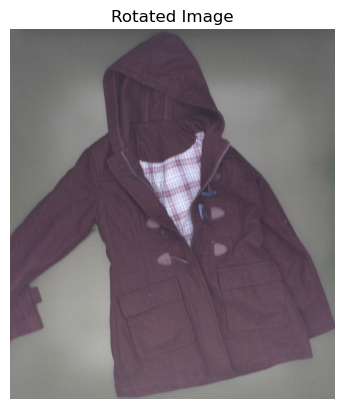

[['shirt', 0.002582550048828125], ['sweatshirt', 0.048736572265625], ['jacket', 0.94873046875]]


In [7]:
image = cv2.imread(fullpath)

rot_accuracy = []
clip_instance.classes = ['shirt', 'sweatshirt','jacket']
for i in range(0,1):

    rot_frame_rgb = image

    # Display the rotated image using Matplotlib
    plt.imshow(rot_frame_rgb)
    plt.title('Rotated Image')
    plt.axis('off')  # Hide axis
    plt.show()

    clip_instance.image = rot_frame_rgb
    res = clip_instance.process(rot_frame_rgb)
    print(res)

In [7]:
ClothingSimilarity.get_weighted_accuracy(2, clip_instance.classes, res, ClothingSimilarity.underwear_matrix)

[['hotpant', 0.9819313049316406],
 ['shirt', 0.7124172210693359],
 ['dress', 0.22641677856445314]]